## **VIRTUAL PROJECT 2**

### **HiCi Case Study**
#### HiCi Ltd is a local food export company. HiCi Ltd is expanding to the European
#### Union. There are risks of product rejection and detaining of the consignment as reported
#### by the EU Food Safety Standard Agency. HiCi Ltd needs to overcome various regulatory
#### hurdles to be able to penetrate the EU market. The hurdles are border rejection, and
#### mass destruction of substandard product. You have been employed by HiCi Ltd as a Data
#### Analyst and provided with raw data from EU Food Safety Standard Agency Portal to help
#### determine:
#### **a. EU member country that reports the highest number of food rejection**
#### **b. The most rejected food**
#### **c. The country of origin of the most rejected food?**
#### **d. The most action taken against food exported to the EU?**
#### **e. The most reported origin (country) food export?**
#### You are to provide a comprehensive report on the above determinants. To prepare the
#### report, you need to visualize the data, create a pivot table of food exported to the EU.
#### Which of the food products are at the highest risk? What are the risks?
#### Which food products would you suggest to the management of HiCi Ltd to focus on?

In [110]:
# Import libraries:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from plotly import graph_objects as go

In [46]:
# Import data:
filepath = r"C:\Users\User\Downloads\HiCi - Africa Food Export.xlsx"
df = pd.read_excel(filepath)
df.head()

,Product category,Year,Notification type,Risk,Notified by,Action taken,Distribution status,Risk decision,Country of origin
0,meat and meat products (other than poultry),1999-08-05,information,NaN,Norway,import not authorised,NaN,undecided,Botswana
1,meat and meat products (other than poultry),1999-08-24,information,NaN,Norway,import not authorised,NaN,undecided,Botswana
2,meat and meat products (other than poultry),1999-09-24,information,NaN,Norway,import not authorised,NaN,undecided,Botswana
3,meat and meat products (other than poultry),2001-06-11,information,NaN,Norway,import not authorised,NaN,undecided,Botswana
4,meat and meat products (other than poultry),2001-06-21,information,NaN,Norway,import not authorised,NaN,undecided,Botswana


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Product category     513 non-null    object        
 1   Year                 513 non-null    datetime64[ns]
 2   Notification type    513 non-null    object        
 3   Risk                 466 non-null    object        
 4   Notified by          513 non-null    object        
 5   Action taken         475 non-null    object        
 6   Distribution status  446 non-null    object        
 7   Risk decision        513 non-null    object        
 8   Country of origin    513 non-null    object        
dtypes: datetime64[ns](1), object(8)
memory usage: 36.2+ KB


In [4]:
df.isna().sum()

Product category        0
Year                    0
Notification type       0
Risk                   47
Notified by             0
Action taken           38
Distribution status    67
Risk decision           0
Country of origin       0
dtype: int64

In [47]:
df.dropna(inplace=True)
df.head()

,Product category,Year,Notification type,Risk,Notified by,Action taken,Distribution status,Risk decision,Country of origin
14,meat and meat products (other than poultry),2004-10-13,information,official control on the market,Norway,return to consignor,distribution restricted to notifying country,undecided,Botswana
15,meat and meat products (other than poultry),2004-10-14,information,official control on the market,Norway,return to consignor,distribution restricted to notifying country,undecided,Botswana
16,meat and meat products (other than poultry),2004-10-18,information,border control - consignment detained,Norway,re-dispatch,no distribution,undecided,Botswana
17,meat and meat products (other than poultry),2004-11-04,information,official control on the market,Norway,re-dispatch,distribution restricted to notifying country,undecided,Botswana
18,meat and meat products (other than poultry),2004-11-08,information,official control on the market,Norway,prohibition to trade - sales ban,distribution restricted to notifying country,undecided,Botswana


#### **Question 1: Determine the EU member country that reports the highest number of food rejection.**

In [6]:
# Rename columns to highlight features eng:
df.columns = ['Product category', 'Year', 'Notification type', 
'Risk', 'Notified by', 'Action taken',  'Distribution status', 'Risk decision', 'Country of origin']

df_filter = df[['Notified by']]

country_with_highest_rejection = df_filter['Notified by'].value_counts()

top_country_rejection = country_with_highest_rejection.idxmax()
top_counts = country_with_highest_rejection.max()

print(f"\033[1mThe EU country with the highest rejection is: {top_country_rejection} ({top_counts} rejections)\033[0m")

The EU country with the highest rejection is: Greece (202 rejections)


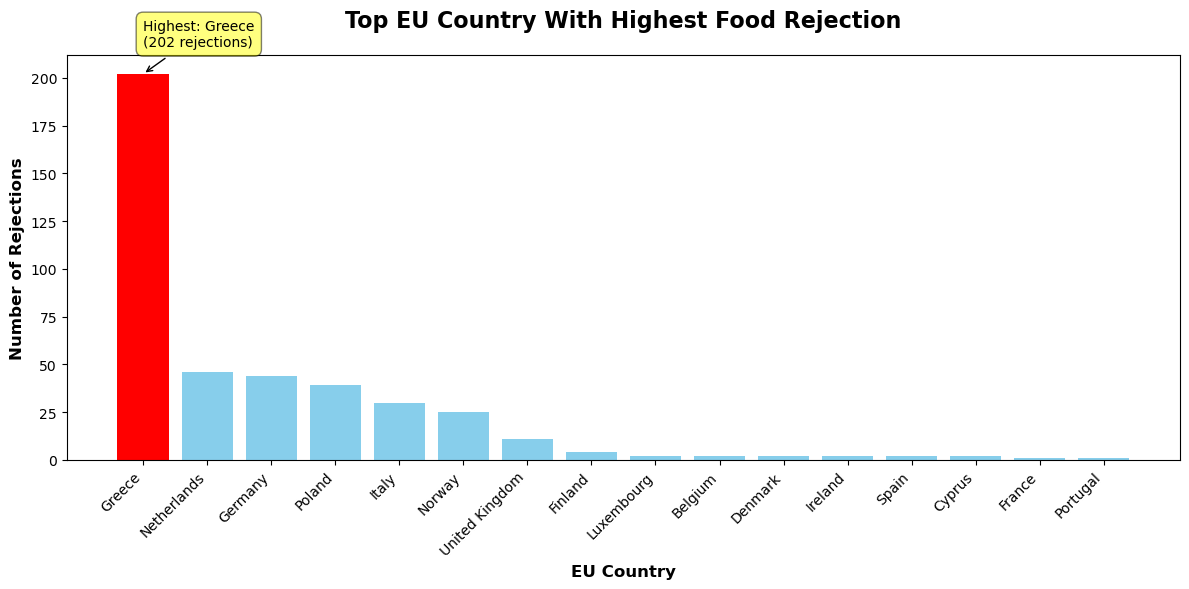

In [7]:
# Plot Visualization for better insight:
plt.figure(figsize=(12, 6))
bars = plt.bar(
country_with_highest_rejection.index, 
    country_with_highest_rejection.values,
    color=['red' if country == top_country_rejection else 'skyblue' for country in country_with_highest_rejection.index]
)

plt.title('Top EU Country With Highest Food Rejection', fontsize=16, pad=20, fontweight='bold')
plt.xlabel("EU Country", fontsize=12, fontweight='bold')
plt.ylabel("Number of Rejections", fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')

plt.annotate(
    f"Highest: {top_country_rejection}\n({top_counts} rejections)",
    xy=(top_country_rejection, top_counts),
    xytext=(0, 20),
    textcoords='offset points',
    bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
    arrowprops=dict(arrowstyle='->')
)

plt.tight_layout()
plt.show()

### **Question 2: Determine the most rejected food.**

In [8]:
print(df_filter.columns.tolist())

['Notified by']


In [9]:
most_rejected_food = df['Product category'].value_counts()

top_most_rejected = most_rejected_food.idxmax()
top_count_most_rejected = most_rejected_food.max()

print(f"\033[1mThe Most Rejected Product Category is: {top_most_rejected} ({top_count_most_rejected} Rejections)\033[0m" )

The Most Rejected Product Category is: nuts, nut products and seeds (310 Rejections)


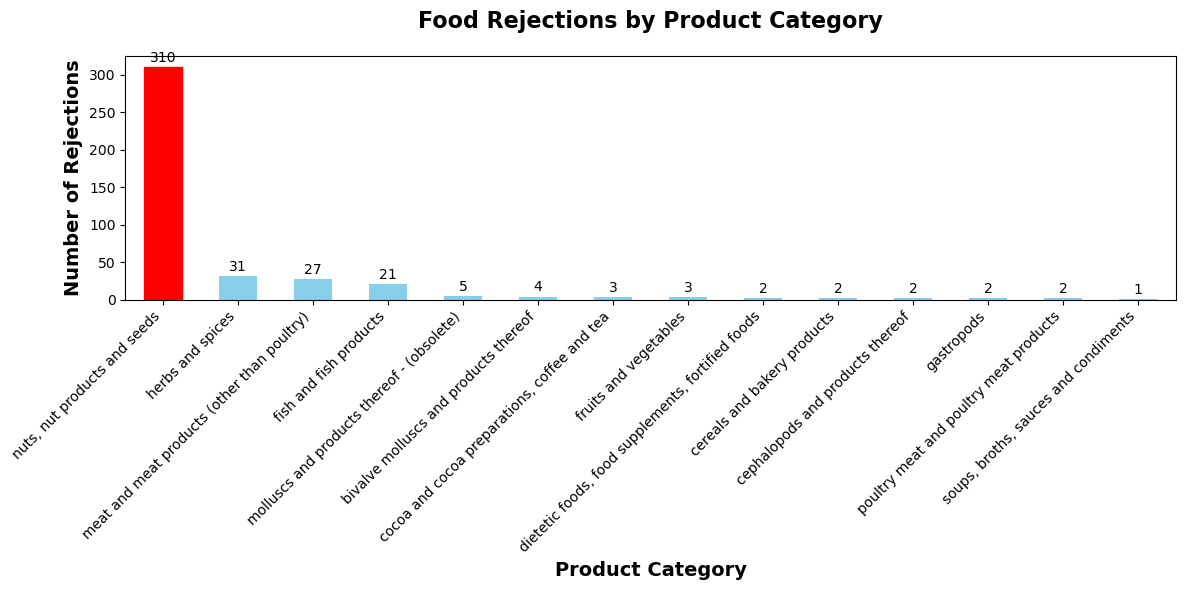

In [10]:
# Plot visualization:

bar = plt.figure(figsize=(12, 6))
bars = most_rejected_food.plot(kind='bar', color='skyblue')

bars.patches[most_rejected_food.index.get_loc(top_most_rejected)].set_color('red')

plt.title("Food Rejections by Product Category", fontsize=16, pad=20, fontweight='bold')
plt.xlabel("Product Category", fontsize=14, fontweight='bold')
plt.ylabel("Number of Rejections", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')

for x, i in enumerate(most_rejected_food):
    plt.text(x, i + 3, str(i), ha='center', va='bottom')

plt.tight_layout()
plt.show()

### **Question 3: Determine the country of origin of the most rejected food?**

In [11]:
# Determine the top country with the highest rejected food:
most_rejected_food_country = df['Country of origin'].value_counts()

top_country = most_rejected_food_country.idxmax()
counts_to_country = most_rejected_food_country.max()

print(f"\033[1mThe Country Origin Of The Most Rejected is: {top_country} ({counts_to_country} Rejections)\033[0m")

The Country Origin Of The Most Rejected is: Sudan (159 Rejections)


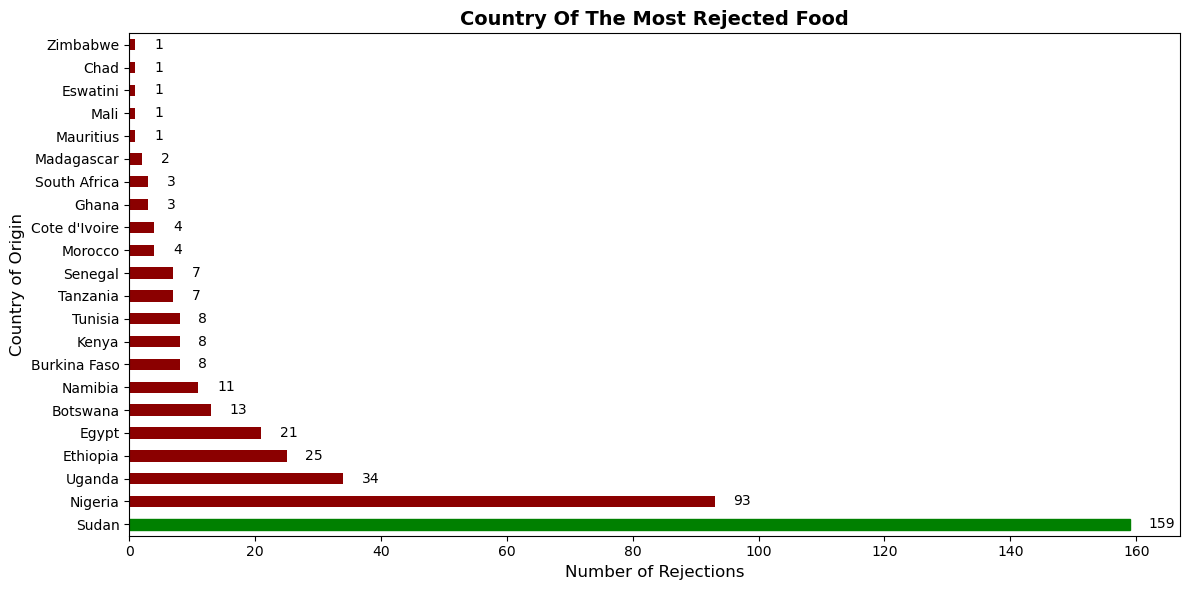

In [12]:
# Plot visualization:
bar = most_rejected_food_country.plot(kind='barh', color='darkred', figsize=(12, 6))

bar.patches[most_rejected_food_country.index.get_loc(top_country)].set_color('green')

plt.title('Country Of The Most Rejected Food', fontsize=14, fontweight='bold')
plt.xlabel('Number of Rejections', fontsize=12)
plt.ylabel('Country of Origin', fontsize=12)

for i, v in enumerate(most_rejected_food_country):
    plt.text(v + 3, i, str(v), va='center', fontsize=10)

plt.tight_layout()
plt.show()

#### **Question 4: Determine the most action taken against food exported to the EU.**

In [13]:
most_action_taken = df['Action taken'].value_counts()

top_most_taken_action = most_action_taken.idxmax()
count_actions_taken = most_action_taken.max()

print(f"\033[1mThe Most Action Taken Against Food Exported To The EU is: {top_most_taken_action} ({count_actions_taken} Rejections)\033[0m")

The Most Action Taken Against Food Exported To The EU is: re-dispatch (115 Rejections)


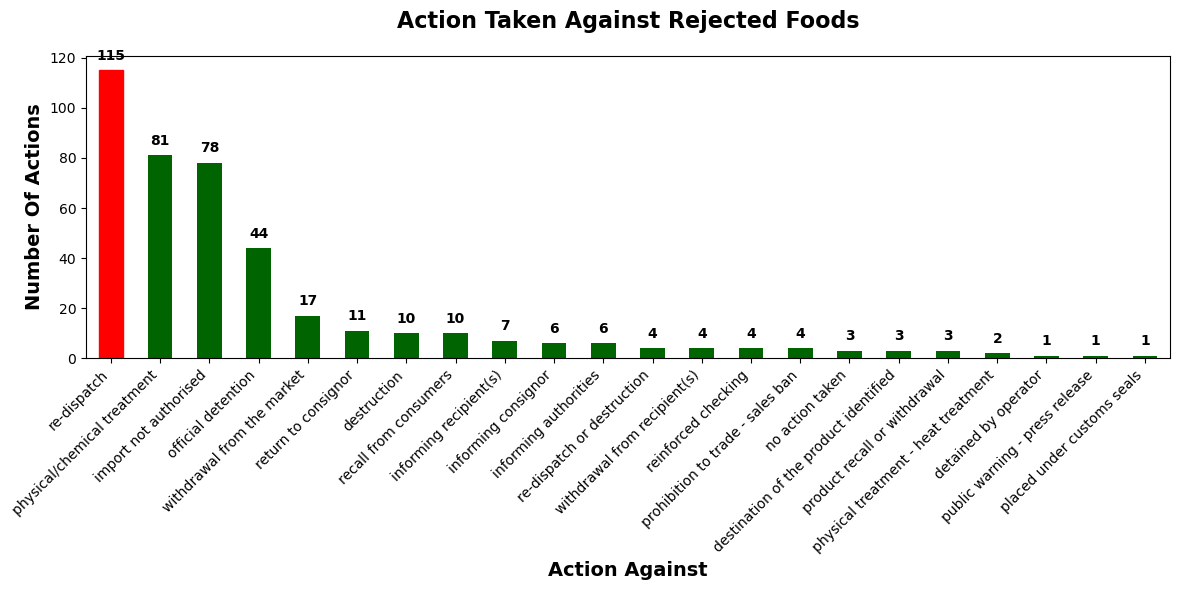

In [14]:
# Plot Visualization to determine the highhest action taken against rejected by EU:

plt.figure(figsize=(12, 6))

bar = most_action_taken.plot(kind='bar', color='darkgreen')
bar.patches[most_action_taken.index.get_loc(top_most_taken_action)].set_color('red')

plt.title('Action Taken Against Rejected Foods', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Action Against', fontsize=14, fontweight='bold')
plt.ylabel('Number Of Actions', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha= 'right')

for x, i in enumerate(most_action_taken):
    plt.text(x, i + 3, str(i), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

#### **Question 5: Determine the most reported origin (country) food export?**

In [15]:
origin_country = df['Country of origin'].value_counts().dropna()

top_origin_country = origin_country.idxmax()
count_top_country = origin_country.max()

print(f"\033[1mThe most reported country of origin for food exports is: {top_origin_country} ({count_top_country} reports)\033[0m")

The most reported country of origin for food exports is: Sudan (159 reports)


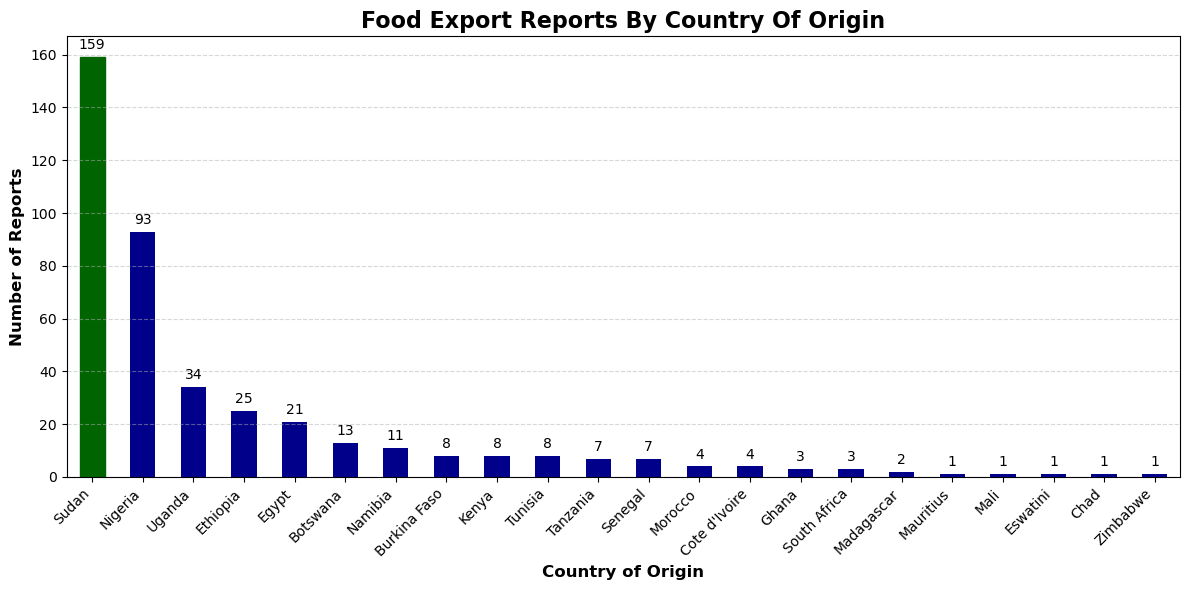

In [16]:
# Visualization:
plt.figure(figsize=(12, 6))
bars = origin_country.plot(kind='bar', color='darkblue')

bars.patches[origin_country.index.get_loc(top_origin_country)].set_color('darkgreen')

plt.title("Food Export Reports By Country Of Origin", fontsize=16, fontweight='bold')
plt.xlabel("Country of Origin", fontsize=12, fontweight='bold')
plt.ylabel("Number of Reports", fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)

for x, i in enumerate(origin_country):
    plt.text(x, i + 3, str(i), ha='center')

plt.tight_layout()
plt.show()

In [17]:
print(df.columns.tolist())

['Product category', 'Year', 'Notification type', 'Risk', 'Notified by', 'Action taken', 'Distribution status', 'Risk decision', 'Country of origin']


In [18]:
pivot = pd.pivot_table(
    df,
    index='Product category',
    columns='Notified by',
    aggfunc='count',
    fill_value=0
)
pivot

Action taken                 \
Notified by                                            Belgium Cyprus Denmark   
Product category                                                                
bivalve molluscs and products thereof                        0      0       0   
cephalopods and products thereof                             0      0       0   
cereals and bakery products                                  0      0       0   
cocoa and cocoa preparations, coffee and tea                 0      0       0   
dietetic foods, food supplements, fortified foods            0      0       0   
fish and fish products                                       0      0       0   
fruits and vegetables                                        0      0       0   
gastropods                                                   0      0       0   
herbs and spices                                             2      0       2   
meat and meat products (other than poultry)                  0      0       0   
molluscs and products thereof - (obsolete)                   0      0       0   
nuts, nut products and seeds                                 0      2       0   
poultry meat and poultry meat products                       0      0       0   
soups, broths, sauces and condiments                         0      0       0   

                                                                          \
Notified by                                       Finland France Germany   
Product category                                                           
bivalve molluscs and products thereof                   0      0       0   
cephalopods and products thereof                        0      0       0   
cereals and bakery products                             0      0       0   
cocoa and cocoa preparations, coffee and tea            0      0       1   
dietetic foods, food supplements, fortified foods       0      0       0   
fish and fish products                                  0      0      10   
fruits and vegetables                                   1      0       2   
gastropods                                              0      0       1   
herbs and spices                                        3      0       3   
meat and meat products (other than poultry)             0      0       0   
molluscs and products thereof - (obsolete)              0      0       0   
nuts, nut products and seeds                            0      1      26   
poultry meat and poultry meat products                  0      0       1   
soups, broths, sauces and condiments                    0      0       0   

                                                                        \
Notified by                                       Greece Ireland Italy   
Product category                                                         
bivalve molluscs and products thereof                  0       0     4   
cephalopods and products thereof                       0       0     2   
cereals and bakery products                            0       0     1   
cocoa and cocoa preparations, coffee and tea           1       0     0   
dietetic foods, food supplements, fortified foods      0       0     0   
fish and fish products                                 0       0     9   
fruits and vegetables                                  0       0     0   
gastropods                                             0       0     1   
herbs and spices                                       0       2     4   
meat and meat products (other than poultry)            0       0     1   
molluscs and products thereof - (obsolete)             1       0     2   
nuts, nut products and seeds                         200       0     5   
poultry meat and poultry meat products                 0       0     1   
soups, broths, sauces and condiments                   0       0     0   

                                                              ...   Year  \
Notified by                                 

In [19]:
highest_risk_df = df[df['Risk decision'] == 'serious']

highest_risk_product = highest_risk_df['Product category'].value_counts()

toplist_risk_product = highest_risk_product.idxmax()
count_top_risk_food = highest_risk_product.max

print(f"The food product at highest risk is: {toplist_risk_product}")
print(f"It has {count_top_risk_food} serious risk notifications")

The food product at highest risk is: nuts, nut products and seeds
It has <bound method Series.max of Product category
nuts, nut products and seeds                         302
herbs and spices                                      19
fruits and vegetables                                  3
dietetic foods, food supplements, fortified foods      2
bivalve molluscs and products thereof                  2
cocoa and cocoa preparations, coffee and tea           1
soups, broths, sauces and condiments                   1
cereals and bakery products                            1
Name: count, dtype: int64> serious risk notifications


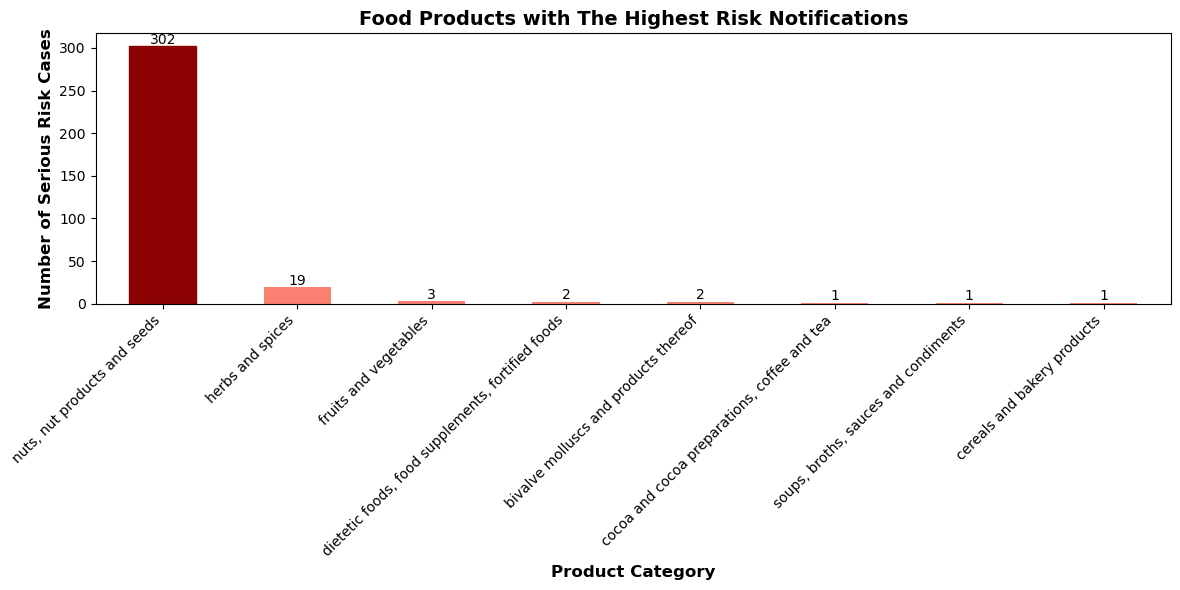


Main risk reasons for nuts, nut products and seeds:
Risk
border control - consignment detained         289
company's own check                             5
official control on the market                  3
border control - consignment under customs      2
border control - consignment released           2
food poisoning                                  1
Name: count, dtype: int64


In [20]:
# Plot visualization:
plt.figure(figsize=(12, 6))
bars = highest_risk_product.plot(kind='bar', color='salmon')

bars.patches[highest_risk_product.index.get_loc(toplist_risk_product)].set_color('darkred')

plt.title("Food Products with The Highest Risk Notifications", fontsize=14, fontweight='bold')
plt.xlabel("Product Category", fontsize=12, fontweight='bold')
plt.ylabel("Number of Serious Risk Cases", fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')

for i, v in enumerate(highest_risk_product):
    plt.text(i, v + 3, str(v), ha='center')

plt.tight_layout()
plt.show()

highest_risk_product = highest_risk_df['Product category'].value_counts().idxmax()

top_risk_product = highest_risk_df[
    highest_risk_df['Product category'] == highest_risk_product
]['Risk'].value_counts()

print(f"\nMain risk reasons for {highest_risk_product}:")
print(top_risk_product)

In [21]:
# Highlight the top 3 most rejected products with serious risks
high_risk_products = df[df["Risk decision"] == "serious"]["Product category"].value_counts().head(3)
print("Top High-Risk Products:\n", high_risk_products)

Top High-Risk Products:
 Product category
nuts, nut products and seeds    302
herbs and spices                 19
fruits and vegetables             3
Name: count, dtype: int64


In [22]:
nut_risks = df[df["Product category"] == "nuts, nut products and seeds"]["Risk"].value_counts()
print("\nRisks for Nuts:\n", nut_risks)


Risks for Nuts:
 Risk
border control - consignment detained         293
official control on the market                  6
company's own check                             5
border control - consignment released           3
border control - consignment under customs      2
food poisoning                                  1
Name: count, dtype: int64


In [23]:
herb_risks = df[df["Product category"] == "herbs and spices"]["Risk"].value_counts()
print("\nRisks for Herbs/Spices:\n", herb_risks)


Risks for Herbs/Spices:
 Risk
official control on the market                20
border control - consignment detained          6
company's own check                            3
border control - consignment released          1
border control - consignment under customs     1
Name: count, dtype: int64


In [24]:
fruit_vegetable_risks = df[df["Product category"] == "fruits and vegetables"]["Risk"].value_counts()
print("\nRisks for Herbs/Spices:\n", fruit_vegetable_risks)


Risks for Herbs/Spices:
 Risk
official control on the market           2
border control - consignment detained    1
Name: count, dtype: int64


In [33]:
# Topmost products to avoid because of high risk decision:

high_risk = df[df["Risk decision"] == "serious"]
print("\nHigh-Risk Products to Avoid:")
print(high_risk["Product category"].value_counts().head(3))


High-Risk Products to Avoid:
Product category
nuts, nut products and seeds    302
herbs and spices                 19
fruits and vegetables             3
Name: count, dtype: int64


In [31]:
# Display the product category with low risk decision
low_risk_products = df[df["Risk decision"] != "serious"]["Product category"].value_counts()

print("Recommended Products (With Low Rejection Risk):")
print(low_risk_products)

Recommended Products (With Low Rejection Risk):
Product category
meat and meat products (other than poultry)     27
fish and fish products                          21
herbs and spices                                12
nuts, nut products and seeds                     8
molluscs and products thereof - (obsolete)       5
cocoa and cocoa preparations, coffee and tea     2
cephalopods and products thereof                 2
gastropods                                       2
poultry meat and poultry meat products           2
bivalve molluscs and products thereof            2
cereals and bakery products                      1
Name: count, dtype: int64


In [52]:
# Highlight processed foods to distinguish them the raw foods:

processed_product_categories = [
    "dietetic foods, food supplements, fortified foods",
    "confectionery",
    "cocoa and cocoa preparations, coffee and tea",
    "soups, broths, sauces and condiments"
]

In [54]:
# Categorize each product
df["Processing_Level"] = df["Product category"].apply(
    lambda x: "processed" if x in processed_product_categories else "raw"
)

processing_risk_level = df.groupby(["Processing_Level", "Risk decision"]).size().unstack()
print("\nRejection Risk by Processing Level:")
print(processing_risk_level)


Rejection Risk by Processing Level:
Risk decision     not serious  serious  undecided
Processing_Level                                 
processed                 NaN      4.0        2.0
raw                       3.0    327.0       79.0


#### **From the categorization above, it's evident that processed foods have minimal to zero risk decisions.**
#### **The analysis showed that processed foods have no "not serious, 4.0 "serious", and 2.0 "undeciided" risk levels.** 
#### **compared to raw foods which have 3.0 "not serious", 327.0 "serious", and 79.0 "undecided" risk levels.**

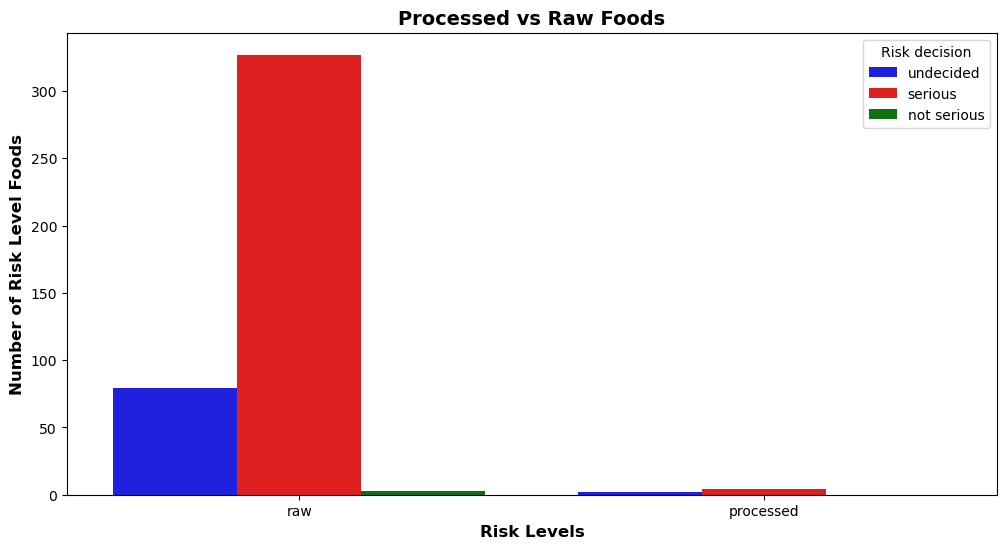

In [63]:
plt.figure(figsize=(12,6))
sns.countplot(
    data=df,
    x='Processing_Level',
    hue="Risk decision",
    palette={'not serious': 'green','serious': 'red', 'undecided': 'blue'}
)
plt.title('Processed vs Raw Foods', fontsize=14, fontweight='bold')
plt.xlabel('Risk Levels', fontsize=12, fontweight='bold')
plt.ylabel('Number of Risk Level Foods', fontsize=12, fontweight='bold')
plt.show()

In [106]:
processed_food_typ = {
    'Canned Mangoes': 'fruits and vegetables',
    'Roasted Cashews': 'nuts, nut products and seeds',
    'Frozen Okra': 'fruits and vegetables',
    'Dried Thyme': 'herbs and spices',
    'Meat Product': 'meat and meat products (other than poultry)',
    'Spice Mix': 'herbs and spices',
    'Frozen Fish': 'fish and fish products',
    'Protein Powder': 'dietetic foods, food supplements, fortified foods',
    'Hot Chocolate Mix': 'cocoa and cocoa preparations, coffee and tea',
    'Frozen Shrimp': 'molluscs and products thereof - (obsolete)',
    'Soy Sauce': 'soups, broths, sauces and condiments',
    'Cereal Bars': 'cereals and bakery products',
    'Octopus Meat': 'cephalopods and products thereof',
    'Snails': 'gastropods',
    'Frozen Clams': 'bivalve molluscs and products thereof',
    'Chicken Nuggets': 'poultry meat and poultry meat products'
}

In [107]:
# Loop through the dictionary above to determine product category by countries
for product_name, category in processed_food_typ.items():
    filtered_df = df[
        df['Product category'].str.contains(category, case=False, na=False)
    ]

    countries = filtered_df['Country of origin'].dropna()

    print(f"\nCountries exporting {product_name} ({category}):")

    if countries.nunique() <= 5:
        print(countries.unique())
    else:
        print(countries.value_counts().head(3))


Countries exporting Canned Mangoes (fruits and vegetables):
['Nigeria' 'Uganda']

Countries exporting Roasted Cashews (nuts, nut products and seeds):
Country of origin
Sudan      159
Nigeria     84
Uganda      29
Name: count, dtype: int64

Countries exporting Frozen Okra (fruits and vegetables):
['Nigeria' 'Uganda']

Countries exporting Dried Thyme (herbs and spices):
Country of origin
Egypt      18
Nigeria     6
Uganda      3
Name: count, dtype: int64

Countries exporting Meat Product (meat and meat products (other than poultry)):
[]

Countries exporting Spice Mix (herbs and spices):
Country of origin
Egypt      18
Nigeria     6
Uganda      3
Name: count, dtype: int64

Countries exporting Frozen Fish (fish and fish products):
Country of origin
Kenya       8
Senegal     5
Tanzania    4
Name: count, dtype: int64

Countries exporting Protein Powder (dietetic foods, food supplements, fortified foods):
['Burkina Faso' 'Ghana']

Countries exporting Hot Chocolate Mix (cocoa and cocoa prepar

#### **Reccomendations**

#### Analyses above have shown that for HiCi Ltd to meet EU Food Safety Standard Agency requirments and
#### escape the risks associated with exporting to EU countries, the management should and must avoid raw foods and focus more 
#### on well processed foods. HiCi must avoid if she insists raw foods fom Sudan and Nigeria,
#### which from analyses have the highest recorded food rejections. She must focus on EU approved and cerified products such as:
#### 1. Canned mangoes	which had only two rejections,
#### 2. Roasted cashews that recorded lower rejection of about 89% than raw nuts,
#### 3. Frozen okra with no rejection history from the dataset,
#### 4. Steam_treated Dried thyme with about 70% acceptance.

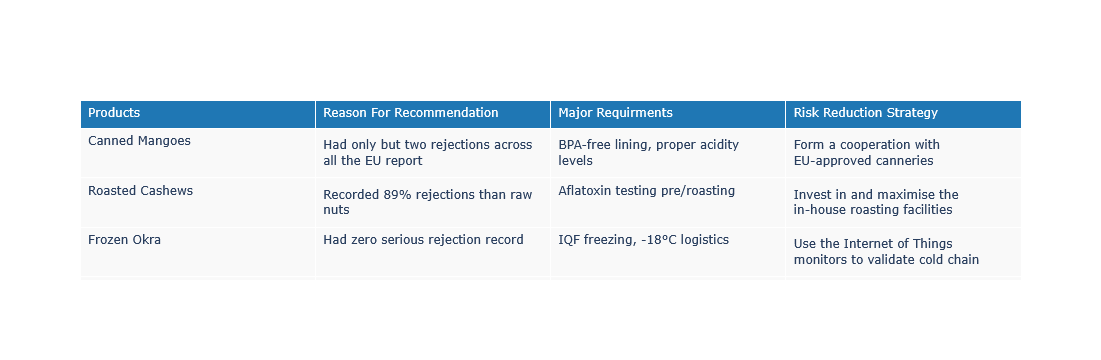

In [114]:
# Create actionable recommendation tabe for visualization:

actionable_recommendation = {
    'Products': ['Canned Mangoes', 
                 'Roasted Cashews',
                 'Frozen Okra', 
                 'Dried Thyme'
    ],

    'Reason For Recommendation': ['Had only but two rejections across all the EU report',
                                  'Recorded 89% rejections than raw nuts',
                                  'Had zero serious rejection record',
                                  'Rejections drop 70% when steam-treated',
        
    ],
        'Major Requirments': ['BPA-free lining, proper acidity levels',
                              'Aflatoxin testing pre/roasting',
                              'IQF freezing, -18°C logistics',
                              'Microbial load <10⁴ CFU/g'
            
    ],
        'Risk Reduction Strategy': ['Form a cooperation with EU-approved canneries',
                                    'Invest in and maximise the in-house roasting facilities',
                                    'Use the Internet of Things monitors to validate cold chain',
                                    'Adopt steam sterilization  to steam treat herbs'
            
    ]
}


df = pd.DataFrame(actionable_recommendation)

fig = go.Figure(data=[go.Table(
    header=dict(values=list(df.columns),
                fill_color='#1f77b4',
                font_color='white',
                align='left'),
    cells=dict(values=[df[col] for col in df.columns],
               fill_color='#f9f9f9',
               align='left'))
])

fig.show()